In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Data Cleaning 

Bad data can be anything that:
- Causes the pipeline to break(for example, null in non-null column).
- Produces incorrect results (For example, duplicate/double transactions)
- Processing is slowed down (for example, large outliers)
- Disregards the rules (for example, text in a number column)

#### Common bad Data
- Missing values in key fields
- Wrong date formats
- Duplicate rows
- Typos in categories
- Unmatched foreign keys

## Data Cleaning for customers data

In [3]:
customers_data = pd.read_csv("amazon_customers_dirty.csv") # read the data

In [4]:
customers_data.head(10) # Review the Raw Data

,customer_id,customer_name,email,country,registration_date
0,C1000,Alexandra Carlson,alexandra.carlson@gmail.com,Chad,11/3/2021
1,C1001,Donna Evans,donna.evans@gmail.com,Afghanistan,8/26/2020
2,C1002,Kimberly Levy,kimberly.levy@outlook.com,monaco,6/27/2014
3,C1003,Jennifer Wells,jennifer.wells@yahoo.com,PARAGUAY,11/11/2024
4,C1004,Erin Garcia,erin.garcia@yahoo.com,Nicaragua,2/2/2024
5,C1005,Jonathon Hood,jonathon.hood@yahoo.com,Cambodia,2/27/2019
6,C1006,Jeffery Lam,NaN,Togo,11/15/2016
7,C1007,Roberta Gardner,roberta.gardner@icloud.com,Colombia,4/14/2022
8,C1008,Ralph Dillon,ralph.dillon@gmail.com,india,10/4/2017
9,C1009,John Acevedo,john.acevedo@icloud.com,Benin,4/16/2024


In [5]:
customers_data.count()

customer_id          1000
customer_name        1000
email                 950
country               970
registration_date    1000
dtype: int64

In [6]:
#Null checks
customers_data.isnull().sum()

customer_id           0
customer_name         0
email                50
country              30
registration_date     0
dtype: int64

In [7]:
customers_data[customers_data["email"].isnull()]

,customer_id,customer_name,email,country,registration_date
6,C1006,Jeffery Lam,NaN,Togo,11/15/2016
37,C1037,Sherri Stanley,NaN,Moldova,11/18/2018
53,C1053,Brian Gates,NaN,Antarctica (the territory South of 60 deg S),5/17/2016
100,C1100,William Sims,NaN,Italy,9/8/2017
120,C1120,Brian Krueger,NaN,Suriname,5/31/2025
123,C1123,Brenda Kelly,NaN,Benin,10/17/2018
129,C1129,Sean Salas,NaN,Burundi,12/31/2023
153,C1153,Jody Mullen PhD,NaN,SEYCHELLES,6/10/2023
162,C1162,Mary Wilson,NaN,British Indian Ocean Territory (Chagos Archipe...,6/22/2025
192,C1192,Erika Mcconnell,NaN,United States Minor Outlying Islands,4/10/2018


In [8]:
customers_data[customers_data["country"].isnull()]

,customer_id,customer_name,email,country,registration_date
90,C1090,Cindy Vazquez,cindy.vazquez@yahoo.com,NaN,6/29/2019
128,C1128,April Powers,april.powers@gmail.com,NaN,8/15/2013
143,C1143,Ryan Mcguire,ryan.mcguire@gmail.com,NaN,4/25/2018
150,C1150,Susan Ramirez,susan.ramirez@yohoo.com,NaN,5/12/2020
231,C1231,Miranda Salinas,miranda.salinas@hotmail.com,NaN,5/7/2020
265,C1265,Robert Clark,robert.clark@outlook.com,NaN,4/20/2024
267,C1267,Terri Lewis,terri.lewis@outlook.com,NaN,10/17/2015
354,C1354,Shane Hickman III,shane.hickman.iii@icloud.com,NaN,1/30/2016
365,C1365,Nicole Turner,nicole.turner@outlook.com,NaN,7/7/2021
424,C1424,Kylie Clark,kylie.clark@yahoo.com,NaN,10/10/2021


In [9]:
#Duplicate check
duplicate_id = customers_data["customer_id"].duplicated().sum()
duplicate_name = customers_data["customer_name"].duplicated().sum()
duplicate_email = customers_data["email"].duplicated().sum()

print(duplicate_id )
print(duplicate_name)
print(duplicate_email)

0
2
49


In [10]:
customers_data[customers_data["customer_name"].duplicated(keep=False)]

,customer_id,customer_name,email,country,registration_date
85,C1085,Michael Jackson,michael.jackson@gmail.com,Singapore,7/26/2022
197,C1197,Melissa Jones,melissa.jones@icloud.com,Sudan,11/5/2018
682,C1682,Michael Jackson,michael.jackson@icloud.com,Honduras,2/19/2021
766,C1766,Melissa Jones,melissa.jones@outlook.com,IRAN,4/17/2015


In [11]:
customers_data[customers_data["email"].duplicated(keep=False)]

,customer_id,customer_name,email,country,registration_date
6,C1006,Jeffery Lam,NaN,Togo,11/15/2016
37,C1037,Sherri Stanley,NaN,Moldova,11/18/2018
53,C1053,Brian Gates,NaN,Antarctica (the territory South of 60 deg S),5/17/2016
100,C1100,William Sims,NaN,Italy,9/8/2017
120,C1120,Brian Krueger,NaN,Suriname,5/31/2025
123,C1123,Brenda Kelly,NaN,Benin,10/17/2018
129,C1129,Sean Salas,NaN,Burundi,12/31/2023
153,C1153,Jody Mullen PhD,NaN,SEYCHELLES,6/10/2023
162,C1162,Mary Wilson,NaN,British Indian Ocean Territory (Chagos Archipe...,6/22/2025
192,C1192,Erika Mcconnell,NaN,United States Minor Outlying Islands,4/10/2018


## Findings from Data Inspection

#### Missing Values

The email column has 50 missing values.

The country column has 30 missing values.

Other columns (customer_id, customer_name, registration_date) are complete.

#### Country Data

Some country entries are inconsistent (e.g., "US", "USA", "U.S.A.").

Standardization is needed to ensure consistent reporting and aggregation.

#### Duplicates

There are some duplicate rows in the dataset.

These need to be removed to maintain unique customer records.

#### Data Cleaning Considerations

Dropping rows with missing values is not recommended because it would reduce dataset size and potentially lose valuable customer information.

Missing emails can be filled with NaN or "Unknown" for analysis purposes.

Missing country values can also be filled with "Unknown" or inferred if possible.

Obvious broken or fully duplicated rows that do not impact reporting can be safely dropped.


In [12]:
# create the new dataset for clean data
clean_customers_data = customers_data.copy()

In [66]:
### Put the unkonw in the missing country rows
clean_customers_data["country"] = clean_customers_data["country"].fillna("Unknow")
clean_customers_data["email"] = clean_customers_data["email"].fillna("Unknow")
print("check null for country :", clean_customers_data["country"].isna().sum())
print("check null for email :", clean_customers_data["email"].isna().sum())

check null for country : 0
check null for email : 0


In [14]:
#Standardize the country value
clean_customers_data["country"] = clean_customers_data["country"].str.lower()

In [19]:
# Add the has_email column because dont want to drop the null values of email
clean_customers_data["has_email"] = clean_customers_data["email"].notnull().astype(int)

In [15]:
clean_customers_data.head(20)

,customer_id,customer_name,email,country,registration_date
0,C1000,Alexandra Carlson,alexandra.carlson@gmail.com,chad,11/3/2021
1,C1001,Donna Evans,donna.evans@gmail.com,afghanistan,8/26/2020
2,C1002,Kimberly Levy,kimberly.levy@outlook.com,monaco,6/27/2014
3,C1003,Jennifer Wells,jennifer.wells@yahoo.com,paraguay,11/11/2024
4,C1004,Erin Garcia,erin.garcia@yahoo.com,nicaragua,2/2/2024
5,C1005,Jonathon Hood,jonathon.hood@yahoo.com,cambodia,2/27/2019
6,C1006,Jeffery Lam,NaN,togo,11/15/2016
7,C1007,Roberta Gardner,roberta.gardner@icloud.com,colombia,4/14/2022
8,C1008,Ralph Dillon,ralph.dillon@gmail.com,india,10/4/2017
9,C1009,John Acevedo,john.acevedo@icloud.com,benin,4/16/2024


# Visualize the distribution of countries


In [16]:
#Count the countries
country_counts = clean_customers_data["country"].value_counts()


In [22]:
country_counts.head(20)

country
unknow                                                 30
haiti                                                  10
marshall islands                                        9
saint pierre and miquelon                               9
honduras                                                9
kuwait                                                  9
nepal                                                   8
romania                                                 8
indonesia                                               8
tokelau                                                 8
british indian ocean territory (chagos archipelago)     8
russian federation                                      8
armenia                                                 8
afghanistan                                             8
netherlands                                             7
united states virgin islands                            7
north macedonia                                         7
kiriba

In [26]:
clean_customers_data["country"].nunique()


238

In [40]:
#Distribution of counts by  country
country_counts = clean_customers_data['country'].value_counts().reset_index()
country_counts.columns = ["country", "count"]
country_counts.head()


,country,count
0,unknow,30
1,haiti,10
2,marshall islands,9
3,saint pierre and miquelon,9
4,honduras,9


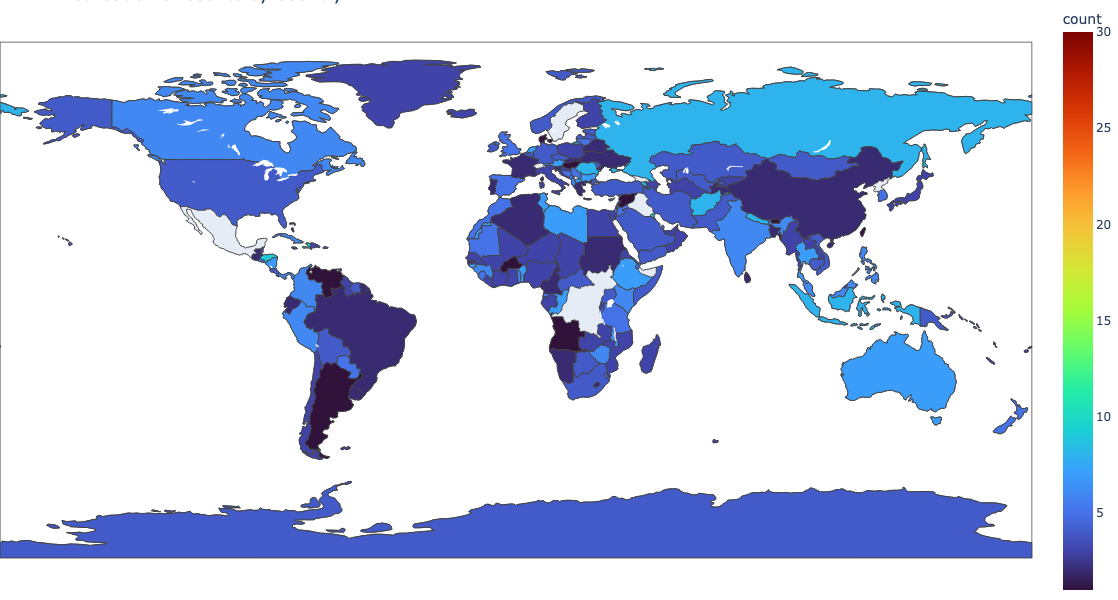

In [61]:
#Plot
fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="count",
    title="Distribution of Counts by Country",
    color_continuous_scale="Turbo"
)
fig.update_layout (
    width= 1000,
    height = 600,
    margin = {"r": 0, "t":0, "l":0, "b":0})


fig.show()

#### Update the color

"Viridis" → smooth purple → yellow gradient (great for perception)

"Cividis" → colorblind-friendly (blue → yellow)

"Plasma" → purple → orange → yellow

"Magma" → black → purple → orange

"Inferno" → black → red → yellow

"Turbo" → rainbow-like

## Data cleaning for deliveries

In [113]:
deliveries = pd.read_csv("amazon_deliveries_dirty.csv")

In [114]:
deliveries.head(10)

,order_id,ship_date,delivery_date,delivery_status,courier
0,O10000,2025-01-04,2025-01-07,On Time,Amazon Logistics
1,O10001,2025-01-03,2025-01-05,Late,Amazon Logistics
2,O10003,2025-01-02,2025-01-04,Late,FedEx
3,O10004,2025-01-02,2025-01-06,On Time,UPS
4,O10005,2025-01-04,NaN,Late,FedEx
5,O10009,2025-01-03,2025-01-05,On Time,DHL
6,O10010,2025-01-04,2025-01-09,On Time,UPS
7,O10013,2025-01-02,2025-01-04,Late,DHL
8,O10014,2025-01-02,2025-01-05,On Time,DHL
9,O10019,2025-01-02,2025-01-04,On Time,DHL


In [115]:
deliveries.isna().sum() # Check for the missing data

order_id             0
ship_date            0
delivery_date      725
delivery_status      0
courier              0
dtype: int64

In [116]:
deliveries.count()

order_id           7254
ship_date          7254
delivery_date      6529
delivery_status    7254
courier            7254
dtype: int64

In [117]:
clean_deliveries = deliveries.copy()

In [118]:
clean_deliveries[clean_deliveries["delivery_date"].isna()]

,order_id,ship_date,delivery_date,delivery_status,courier
4,O10005,2025-01-04,NaN,Late,FedEx
14,O10031,2025-01-04,NaN,On Time,DHL
32,O10060,2025-01-03,NaN,Late,FedEx
44,O10083,2025-01-04,NaN,Late,UPS
54,O10103,2025-01-02,NaN,Late,UPS
...,...,...,...,...,...
7197,O24548,2025-07-02,NaN,Late,UPS
7200,O24557,2025-07-01,NaN,Late,FedEx
7233,O24618,2025-07-03,NaN,On Time,Amazon Logistics
7242,O24649,2025-07-02,NaN,On Time,UPS


### Handling Null Values in delivery_date

After inspecting the delivery_date column, I found some missing values. Upon cross-checking with delivery_status, I noticed that some of these orders have already been delivered. Therefore, I will update the missing delivery_date only for orders where delivery_status is “On Time”.

In [127]:
clean_deliveries["delivered"] = np.where(
    ((clean_deliveries["delivery_status"] == "On Time") & clean_deliveries["delivery_date"].isna()) |
    ((clean_deliveries["delivery_status"].isin(["On Time", "Late"])) & clean_deliveries["delivery_date"].notna()),
    1,
    0
)
     
    
clean_deliveries.head(20)

,order_id,ship_date,delivery_date,delivery_status,courier,delivered
0,O10000,2025-01-04,2025-01-07,On Time,Amazon Logistics,1
1,O10001,2025-01-03,2025-01-05,Late,Amazon Logistics,1
2,O10003,2025-01-02,2025-01-04,Late,FedEx,1
3,O10004,2025-01-02,2025-01-06,On Time,UPS,1
4,O10005,2025-01-04,NaN,Late,FedEx,0
5,O10009,2025-01-03,2025-01-05,On Time,DHL,1
6,O10010,2025-01-04,2025-01-09,On Time,UPS,1
7,O10013,2025-01-02,2025-01-04,Late,DHL,1
8,O10014,2025-01-02,2025-01-05,On Time,DHL,1
9,O10019,2025-01-02,2025-01-04,On Time,DHL,1


In [128]:
clean_deliveries["delivered"].value_counts()

delivered
1    6902
0     352
Name: count, dtype: int64

#### After updating "delivered" column , I know only 352 row are missing. Now I will compare the average time gap of ship_date and delivery_date and update the average time 

In [139]:
# Convert columns to datetime (if not already)
clean_deliveries['ship_date'] = pd.to_datetime(clean_deliveries['ship_date'], errors='coerce')
clean_deliveries['delivery_date'] = pd.to_datetime(clean_deliveries['delivery_date'], errors='coerce')

# Now calculate delivery time in days
clean_deliveries['delivery_time_days'] = (clean_deliveries['delivery_date'] - clean_deliveries['ship_date']).dt.days

# Check result
clean_deliveries.head(20)


,order_id,ship_date,delivery_date,delivery_status,courier,delivered,delivery_time_days
0,O10000,2025-01-04,2025-01-07,On Time,Amazon Logistics,1,3.0
1,O10001,2025-01-03,2025-01-05,Late,Amazon Logistics,1,2.0
2,O10003,2025-01-02,2025-01-04,Late,FedEx,1,2.0
3,O10004,2025-01-02,2025-01-06,On Time,UPS,1,4.0
4,O10005,2025-01-04,NaT,Late,FedEx,0,NaN
5,O10009,2025-01-03,2025-01-05,On Time,DHL,1,2.0
6,O10010,2025-01-04,2025-01-09,On Time,UPS,1,5.0
7,O10013,2025-01-02,2025-01-04,Late,DHL,1,2.0
8,O10014,2025-01-02,2025-01-05,On Time,DHL,1,3.0
9,O10019,2025-01-02,2025-01-04,On Time,DHL,1,2.0


In [161]:
## find the average over all time gap 
average_time_all = clean_deliveries["delivery_time_days"].mean()
print("Average delivery day:", average_time_all)
print("-" * 30)


#Average delivery time based on delivery_status
average_time_status = clean_deliveries.groupby("delivery_status")["delivery_time_days"].mean().reset_index()
print("Average delivery time by status:")
print(average_time_status)
print("-" * 30)

average_time_courier = clean_deliveries.groupby("courier")["delivery_time_days"].mean().reset_index()
print("Average delivery time by courier:")
print(average_time_courier)
print("-" * 30)

Average delivery day: 3.486138765507735
------------------------------
Average delivery time by status:
  delivery_status  delivery_time_days
0            Late            3.498301
1         On Time            3.474180
------------------------------
Average delivery time by courier:
            courier  delivery_time_days
0  Amazon Logistics            3.519231
1               DHL            3.506558
2             FedEx            3.479419
3               UPS            3.441106
------------------------------


### Overall average delivery time: 3 and half days for all orders.

By delivery status:

Late orders take ~3.50 days on average.

On Time orders take ~3.47 days on average.

By courier:

Amazon Logistics: ~3.52 days

DHL: ~3.51 days

FedEx: ~3.48 days

UPS: ~3.44 days

### Now I will update the delivery_date Nan values  by adding 3 days

In [175]:
clean_deliveries["delivery_date"] = clean_deliveries["delivery_date"].fillna(clean_deliveries["ship_date"] + pd.Timedelta(days=3))
clean_deliveries["delivery_time_days"] = clean_deliveries["delivery_time_days"].fillna(3.0)
clean_deliveries.isna().sum() ## No missing values

order_id              0
ship_date             0
delivery_date         0
delivery_status       0
courier               0
delivered             0
delivery_time_days    0
dtype: int64

## Data Cleaning for Order items

In [18]:
order_items = pd.read_csv("amazon_order_items_dirty.csv")

In [19]:
order_items.head(10)

,order_id,product_id,quantity,unit_price,total_price,discount
0,O17514,P1158,1,60.26,58.45,0.03
1,O15928,P1135,3,244.93,727.44,0.01
2,O17835,P1007,2,63.19,120.06,0.05
3,O16903,P1240,1,211.77,160.95,0.24
4,O22488,P1287,1,285.36,239.70,0.16
5,O15481,P1005,5,291.27,1208.77,NaN
6,O22920,P1012,1,237.70,194.91,0.18
7,O11353,P1277,3,127.01,297.20,0.22
8,O10608,P1298,1,59.97,47.38,0.21
9,O10718,P1248,1,32.54,23.43,0.28


In [20]:
order_items.isna().sum()

order_id          0
product_id        0
quantity          0
unit_price        0
total_price       0
discount       1760
dtype: int64

In [21]:
order_items.count()

order_id       44004
product_id     44004
quantity       44004
unit_price     44004
total_price    44004
discount       42244
dtype: int64

In [22]:
missing_data_percentange = order_items.isna().sum() / len(order_items) * 100
print(missing_data_percentange)

order_id       0.000000
product_id     0.000000
quantity       0.000000
unit_price     0.000000
total_price    0.000000
discount       3.999636
dtype: float64


In [23]:
order_items.dropna(subset=['discount'], inplace=True) ##Drop the rows because less than 10 %

In [24]:
order_items.isna().sum() # No missing data

order_id       0
product_id     0
quantity       0
unit_price     0
total_price    0
discount       0
dtype: int64

## Data Cleaning Orders


In [25]:
orders = pd.read_csv("amazon_orders_dirty.csv")

In [26]:
orders.head(10)

,order_id,customer_id,order_date,order_status
0,O10000,C1198,01-01-2025,Delivered
1,O10001,C1359,01-01-2025,Shipped
2,O10002,C1241,01-01-2025,Placed
3,O10003,C1149,01-01-2025,Delivered
4,O10004,C1202,01-01-2025,Shipped
5,O10005,C1616,01-01-2025,Shipped
6,O10006,C1778,01-01-2025,Placed
7,O10007,C1181,01-01-2025,Cancelled
8,O10008,C1475,01-01-2025,Cancelled
9,O10009,C1697,01-01-2025,Delivered


In [27]:
orders.count()

order_id        14668
customer_id     14668
order_date      14668
order_status    14228
dtype: int64

In [28]:
orders.isna().sum()

order_id          0
customer_id       0
order_date        0
order_status    440
dtype: int64

In [29]:
missing_data_percentange = orders.isna().sum() / len(orders) * 100
print(missing_data_percentange)

order_id        0.000000
customer_id     0.000000
order_date      0.000000
order_status    2.999727
dtype: float64


In [30]:
# Less then 10 % decides to drop the rows
orders.dropna(subset=["order_status"], inplace=True)


In [31]:
orders.isna().sum() # No missing data

order_id        0
customer_id     0
order_date      0
order_status    0
dtype: int64

## Data Cleaning Product



In [32]:
products= pd.read_csv("amazon_products_dirty.csv")

In [33]:
products.head(10)

,product_id,product_name,category,unit_cost,unit_price
0,P1000,Trouble Lite,Health,40.58,285.71
1,P1001,Rich Lite,Office Supplies,74.54,183.61
2,P1002,Without Kit,Sports,19.82,55.24
3,P1003,International Max,Office Supplies,10.52,261.19
4,P1004,Race Pro,Fashion,NaN,215.34
5,P1005,Artist Kit,Fashion,6.96,291.27
6,P1006,Set Lite,Books,84.08,71.58
7,P1007,Year Kit,Office Supplies,22.27,63.19
8,P1008,Company Kit,Fashion,33.90,162.18
9,P1009,Treat Max,Books,46.03,94.46


In [34]:
products.count()

product_id      300
product_name    300
category        300
unit_cost       295
unit_price      300
dtype: int64

In [35]:
products.isna().sum()

product_id      0
product_name    0
category        0
unit_cost       5
unit_price      0
dtype: int64

In [36]:
missing_data_percentange = products.isna().sum() / len(products) * 100
print(missing_data_percentange)

product_id      0.000000
product_name    0.000000
category        0.000000
unit_cost       1.666667
unit_price      0.000000
dtype: float64


In [37]:
#Less than 10% , decided to drop the rows
products.dropna(subset= ["unit_cost"], inplace=True)

In [38]:
products.isna().sum() # No missing data

product_id      0
product_name    0
category        0
unit_cost       0
unit_price      0
dtype: int64

## Data Cleaning Stock


In [39]:
stocks= pd.read_csv("amazon_stock_dirty.csv")

In [40]:
stocks.head(10)

,product_id,warehouse_location,stock_level,last_updated
0,P1076,Tokyo,284.0,2025-03-03
1,P1062,Berlin,329.0,2025-01-17
2,P1289,Tokyo,NaN,2025-03-04
3,P1010,NYC,26.0,2025-02-16
4,P1227,NYC,136.0,2025-05-26
5,P1005,Tokyo,36.0,2025-06-13
6,P1227,Delhi,20.0,2025-03-15
7,P1003,NYC,430.0,2025-03-04
8,P1265,Berlin,236.0,2025-01-01
9,P1275,Tokyo,475.0,2025-06-16


In [41]:
stocks.count()

product_id            1000
warehouse_location    1000
stock_level            970
last_updated          1000
dtype: int64

In [42]:
stocks.isna().sum()

product_id             0
warehouse_location     0
stock_level           30
last_updated           0
dtype: int64

In [43]:
missing_data_persentage = stocks.isna().sum()/ len(stocks) * 100
print(missing_data_persentage)

product_id            0.0
warehouse_location    0.0
stock_level           3.0
last_updated          0.0
dtype: float64


In [44]:
# less than 10%, drop the rows
stocks.dropna(subset=["stock_level"], inplace=True)

In [45]:
stocks.isna().sum() # No missing data

product_id            0
warehouse_location    0
stock_level           0
last_updated          0
dtype: int64